## Mapping
The first step to display data on the cerebellar surface is to map it to the flatmap. 

In [1]:
# Import the Suit package
import SUITPy.flatmap as flatmap
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

%matplotlib inline 

The following command maps an example functional volume to the surface. The mapped data is returned as a numpy array.

In [2]:
funcdata = flatmap.vol_to_surf('MDTB08_Math.nii')
print('Output is a np.array of size:',funcdata.shape)

Output is a np.array of size: (28935, 1)


The function takes either a list of filenames, or a list of nibable.NiftiImage to be mapped

### Atlas space
By default, the function assumes that the data is mapped to SUIT space. You can specify the normalization space with the optional input argument `space`. Options are 'SUIT', 'FSL', or 'SPM'.  

In [3]:
# Signals the function that the volume was mapped to SUIT space (default): 
funcdata = flatmap.vol_to_surf('MDTB08_Math.nii',space='SUIT')

### Mapping ROI labels 
By default the `vol_to_surf` assumes that the data is continuous functional data and it therefore averages the data across voxels. If you want to map a segmentation volume that contains discrete labels, you can specify to use the mode, rather than the mean. 

In [4]:
labeldata = flatmap.vol_to_surf('Buckner_17Networks.nii',stats = 'mode')

### Mapping many volumes 
You can also map a whole set of volumes by passing a list to `vol_to_surf`. This will be faster than mapping all volumes seperately. 


In [5]:
labeldata = flatmap.vol_to_surf(['Buckner_7Networks.nii','Buckner_17Networks.nii'],stats = 'mode')
print('Output is a np.array of size:',funcdata.shape)

Output is a np.array of size: (28935, 1)


## Plotting
### Plotting of functional overlays

The functional data that we just mapped can be plotted with the functional `flatmap.plot`. By default, the current version of the plotting routine uses matplotlib for rendering. The main input argument can be a np-array with the data to plot, a gifti image object, or the name of a gifti file to load. The upper and lower threshold are set with `threshold`. 

For full funtion reference see the function reference for the flatmap module. 

<AxesSubplot:>

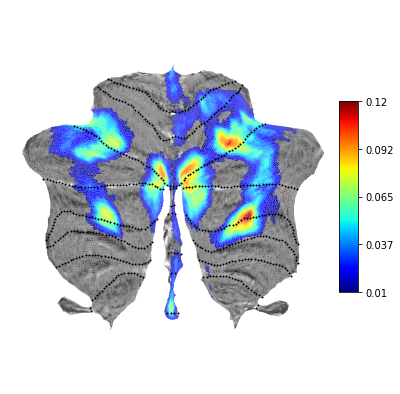

In [6]:
flatmap.plot(data=funcdata, cmap='jet', threshold=[0.01, 0.12], new_figure=True, colorbar=True)


### Plotting Label data
For label data choose overlay_type = 'label' and set the colormap to a qualitative (categorical) color map. 
By opening a matplotlib figure first, you can specify the size. 

<AxesSubplot:>

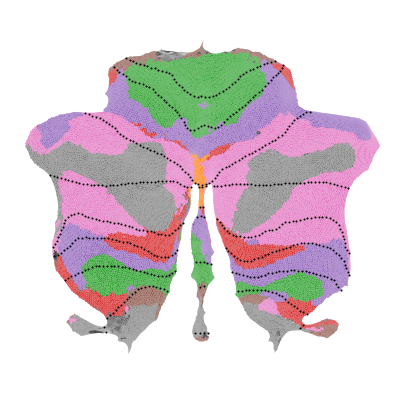

In [7]:
plt.figure(figsize=(7,7))
flatmap.plot(labeldata, overlay_type='label', cmap='tab10', colorbar=False)

### Plotting directly to a gifti file
You can also plot directly from a gifti file. When you choose 'label', `suit.flatmap.plot` will also extract the color map from the label.gii file and use it. 

<AxesSubplot:>

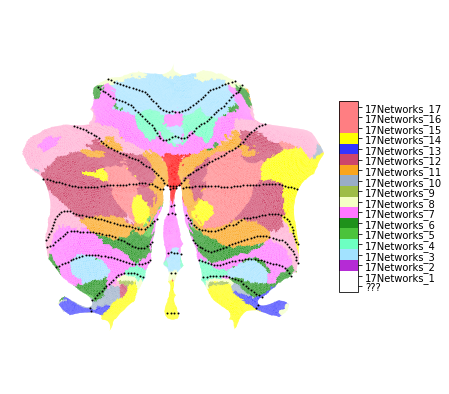

In [8]:
flatmap.plot('Buckner_17Networks.label.gii',overlay_type='label',new_figure=True, colorbar=True)

### Combining flatmaps in subplots 
By default, `flatmap.plot` renders the flatmap into the current axis of matplotlib. This enables the user to combine combine different flatmaps in one figure using different subplots. 

<AxesSubplot:>

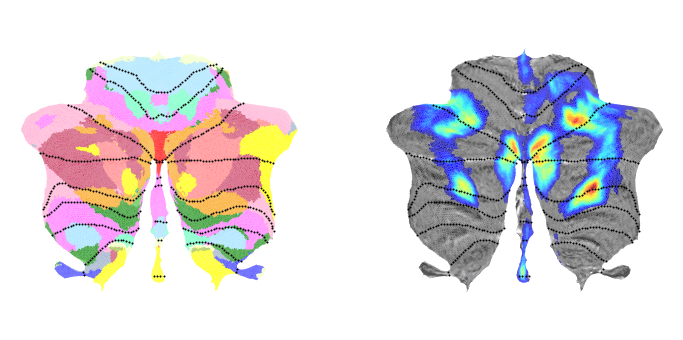

In [9]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
flatmap.plot('Buckner_17Networks.label.gii',overlay_type='label')
plt.subplot(1,2,2)
flatmap.plot(data=funcdata, cmap='jet', threshold=[0.01, 0.12])
